<a href="https://colab.research.google.com/github/kimqkr4/submission/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B56%EC%A3%BC%EC%B0%A8_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제0406

## 데이터 읽기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


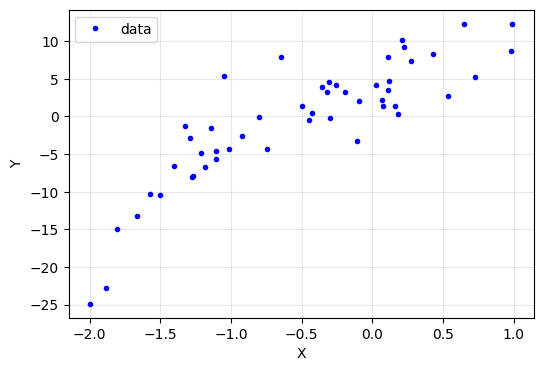

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data0405.csv', usecols=['x','y']).values

x = a[:,0]
x = x.reshape(50,-1)

y = a[:,1]
y = y.reshape(50,-1)

plt.figure(figsize = (6, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 선형모델(최소제곱법)

omega:
 [[3.94188011]
 [8.73592461]]


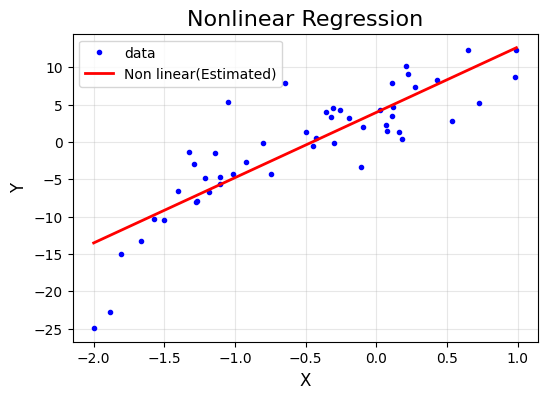

In [ ]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
yp = w[0,0] + w[1,0]*xp

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 비선형(2차) 모델

omega:
 [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]


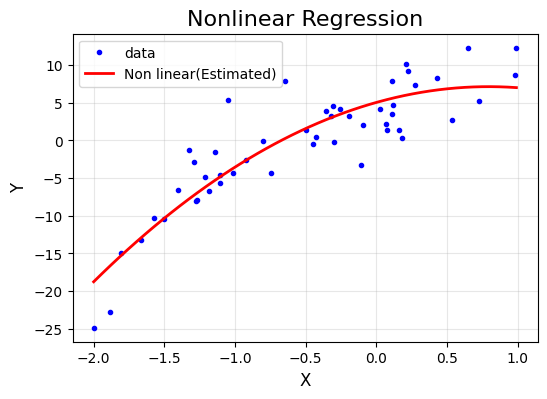

In [ ]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 비선형(4차) 모델

omega:
 [[ 3.63261904]
 [ 5.43470387]
 [ 1.83955091]
 [ 0.76437773]
 [-1.20609535]]


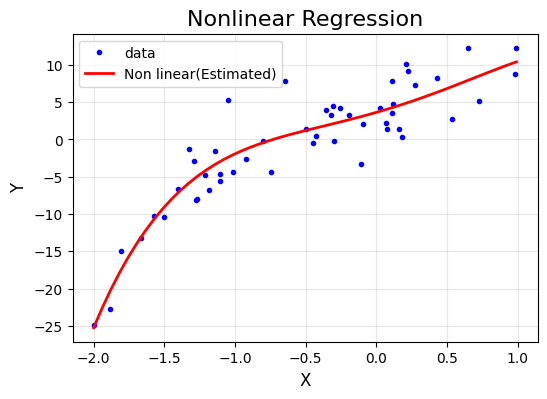

In [ ]:
A = np.hstack([x**0, x, x**2, x**3, x**4])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2 + w[3,0]*xp**3 + w[4,0]*xp**4

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 선형모델(경사하강법)

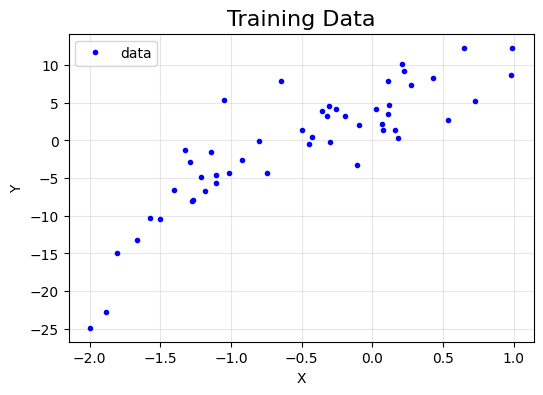

[8.63024316] [3.85000026]


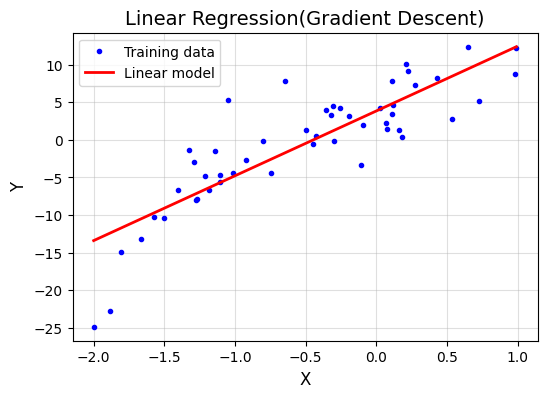

In [ ]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data0405.csv', usecols=['x','y']).values

x = a[:,0]
x = x.reshape(50,-1)

y = a[:,1]
y = y.reshape(50,-1)

plt.figure(figsize = (6, 4))
plt.title('Training Data', fontsize = 16)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

w1 = 0       # 기울기
w0 = 0       # 절편

lrate = 0.001  # 학습률(Learning rate) --> α
epochs = 10000  # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w1*x + w0  		          	# 선형 회귀 예측값
    dw1 = (1/n) * sum(x * (y_pred-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    dw0 = (1/n) * sum(y_pred-y)  	      # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w1 = w1 - lrate * dw1           		# 기울기 update
    w0 = w0 - lrate * dw0  		          # 절편 update
print (w1, w0)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 14)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', markersize = 3, label = "Training data")

xp = np.linspace(np.min(x), np.max(x))
y_pred = w1*xp + w0  # 예측값을 만든다.
plt.plot(xp, y_pred, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

# Logistic Regression -- 분류(Classification)

## Odds function

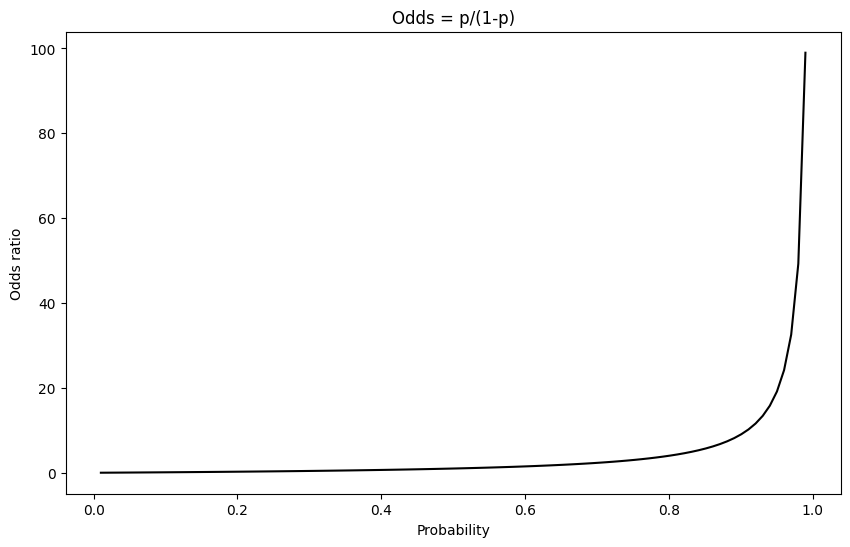

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p = np.linspace(0.01, 0.99, 100)

# 오즈 함수 정의
odds = p / (1-p)

# 오즈 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(p, odds, color='k')
plt.xlabel('Probability')
plt.ylabel('Odds ratio')
plt.title('Odds = p/(1-p)')
plt.show()

## Logit function

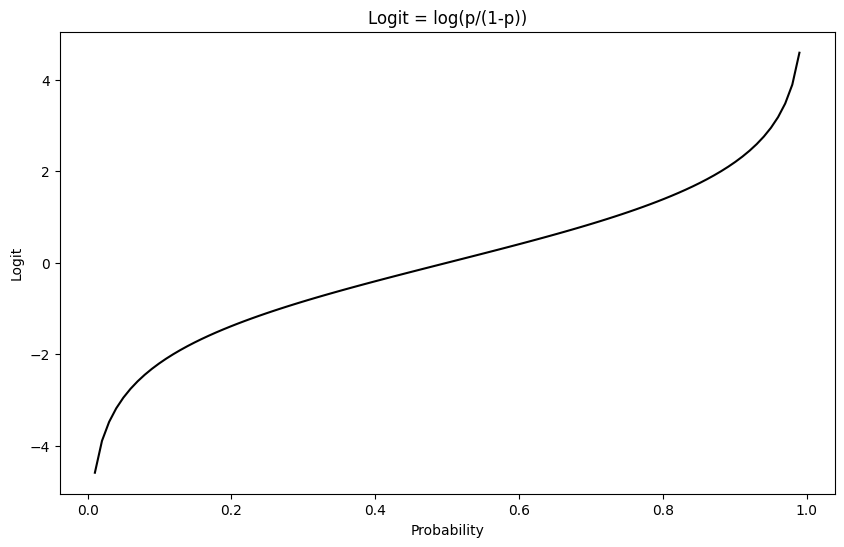

In [ ]:
p = np.linspace(0.01, 0.99, 100)

# 로짓(Logit) 함수 정의
logit = np.log(p / (1 - p))

# 로짓 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(p, logit, color='k')
plt.xlabel('Probability')
plt.ylabel('Logit')
plt.title('Logit = log(p/(1-p))')
plt.show()

##  Sigmoid function

$$ \sigma(z) = \frac{1}{1+e^{-z}} \implies \sigma \left(\omega^T x \right) = \frac{1}{1+e^{-\omega^T x}}$$

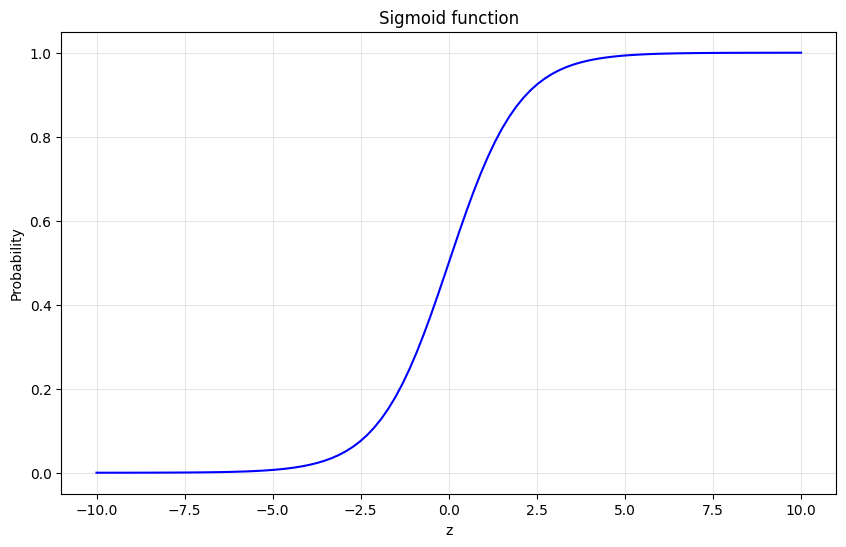

In [ ]:
z = np.linspace(-10, 10, 100)

# 시그모이드 함수 정의
sigmoid = 1 / (1 + np.exp(-z))

# 시그모이드 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, color='b')
plt.xlabel('z')
plt.ylabel('Probability')
plt.title('Sigmoid function')
plt.grid(alpha = 0.3)
plt.show()

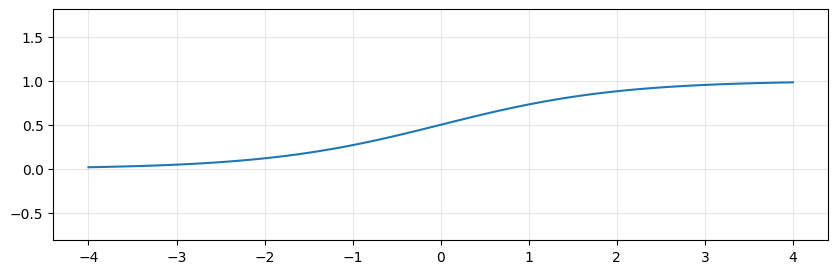

In [ ]:
# Sigmoid function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.linspace(-4,4,100)
s = 1/(1 + np.exp(-z))

plt.figure(figsize = (10, 3))
plt.plot(z, s)
plt.xlim([-4, 4])
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

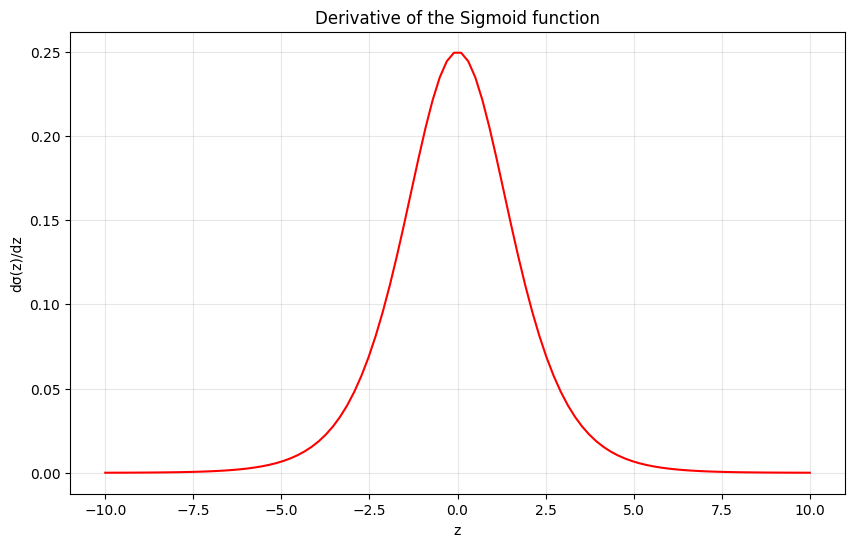

In [ ]:
# 시그모이드 미분 함수 정의
def sigmoid_diff(z):
    sigmoid =  1 / (1 + np.exp(-z))
    return sigmoid * (1 - sigmoid)

z = np.linspace(-10, 10, 100)

# 시그모이드 미분 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid_diff(z), color='r')
plt.xlabel('z')
plt.ylabel('dσ(z)/dz')
plt.title('Derivative of the Sigmoid function')
plt.grid(alpha = 0.3)
plt.show()

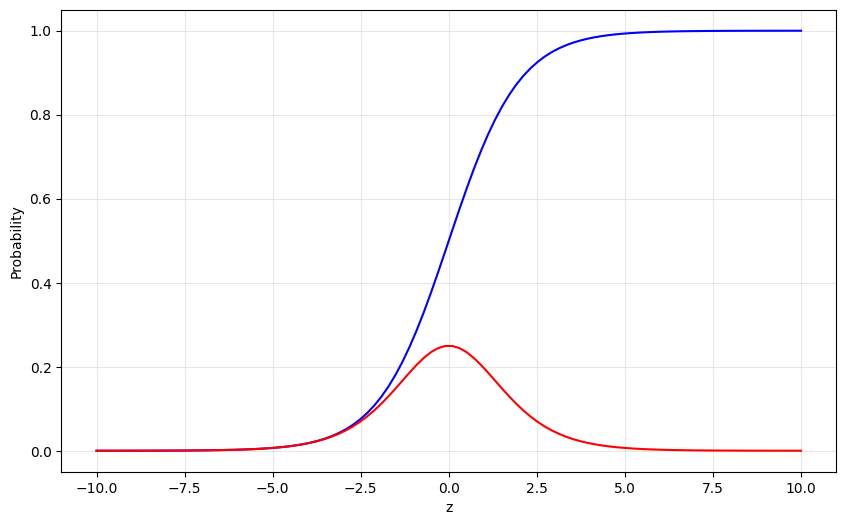

In [ ]:
# 시그모이드 함수와 시그모이드 미분 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, color='b')
plt.xlabel('z')
plt.ylabel('Probability')
plt.grid(alpha = 0.3)
plt.plot(z, sigmoid_diff(z), color='r')
plt.show()

<br>**예측함수(Hypothesis function)**
$$h_{\omega}(x) = h(x\,;\omega) =  \sigma \left(\omega^T x\right) = \frac{1}{1+e^{-\omega^T x}}$$
<br>

**1개의 학습 데이터 $(x,y)$ 에 대한 확률**
<br>
$$
\begin{align*}
1이\ 나올 \ 확률 :   P\left(y = +1 \mid x\,;\omega\right) &= h_{\omega}(x) = \sigma \left(\omega^T x \right)\\
0이\ 나올 \ 확률 :  P\left(y = 0 \mid x\,;\omega\right) &=  1 - h_{\omega}(x) = 1- \sigma \left(\omega^T x \right)
\end{align*}
$$

<br>

**1이 나올 확률 ($y = 1$)과 0이 나올 확률 ($y = 0$)의 곱의 확률**
<br>

$$P\left(y \mid x\,;\omega\right) = \left(h_{\omega}(x) \right)^y \left(1 - h_{\omega}(x)\right)^{1-y}$$

<br>

**$m$개의 학습 데이터 $(x,y)$ 에 대한 파라미터의 우도함수(likelihood function)**
<br>

$$
\begin{align*}
\mathscr{L}(\omega) &= P\left(y^{(1)}, \cdots, y^{(m)} \mid x^{(1)}, \cdots, x^{(m)}\,;\omega\right)\\
&= \prod\limits_{i=1}^{m}P\left(y^{(i)} \mid x^{(i)}\,;\omega\right)\\
&= \prod\limits_{i=1}^{m}\left(h_{\omega}\left(x^{(i)}\right) \right)^{y^{(i)}} \left(1 - h_{\omega}\left(x^{(i)}\right)\right)^{1-y^{(i)}} \qquad \left(\sim \prod_i \lvert h_i \rvert \right)
\end{align*}
$$

<br>

**로그 우도함수(Log likelihood function)**
<br>

$$\ell(\omega) = \log \mathscr{L}(\omega) = \sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$

<br>

<br>

**교차 엔트로피 오차(Cross Entropy error)**
<br>

$$\ error(\omega) = \ -log \mathscr{L}(\omega) = -\sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$

<br>

**최적의 파라미터**
<br>

$$\hat{\omega} = \arg\max_{\omega} \ell(\omega)$$

<br>

## 학습 데이터 생성

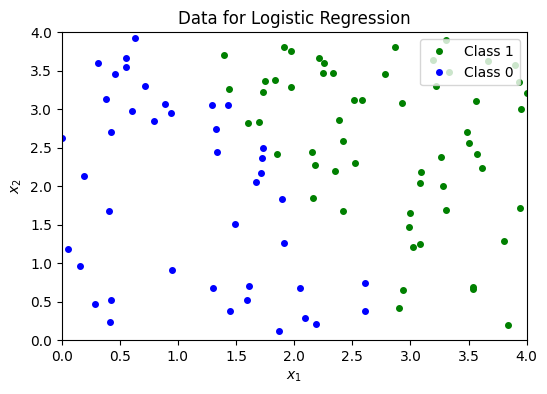

In [ ]:
# 학습 데이터 생성

m = 100
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1 + np.exp(-X*w)) > 0.5    # ([true],...[false]....])

C1 = np.where(y == True)[0]   # y가 true인 인덱스 값을 return
C0 = np.where(y == False)[0]  # y가 false인 인덱스 값을 return

y = np.empty([m,1])
y[C1] = 1   # Class 1
y[C0] = 0   # Class 0

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.title('Data for Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using CVXPY
$$
\begin{align*}
p &= \frac{1}{1+e^{-\omega^T x}} = \frac{e^{\omega^T x}}{e^{\omega^T x} + 1}\\
1-p &= \frac{1}{e^{\omega^T x} + 1}
\end{align*}
$$

<br>

학습 데이터를 재배열
- 데이터 $x_1, \cdots, x_q$  ----->   $y = +1$을 출력
- 데이터 $x_{q+1}, \cdots, x_m$ ----> $y=0$을 출력

<br>
우도함수(The likelihood function)
<br>

$$\mathscr{L} = \prod\limits_{i=1}^{q}{p_i}\prod\limits_{i=q+1}^{m}{(1-p_i)}$$

<br>
로그우도함수(The log likelihood function)

<br>

$$
\begin{align*}
\ell(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*}
$$

<br>

Since $\ell$ is a concave function of $\omega$, the logistic regression problem can be solved as a convex optimization problem

<br>
$$\hat{\omega} = \arg\max_{\omega} \ell(\omega)$$
$$\hat{\omega} = -\arg\min_{\omega} \ell(\omega)$$
<br>

<br>
$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix}, \qquad x = \begin{bmatrix} 1 \\ x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots & \vdots \\\end{bmatrix}, \qquad y = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$
<br><br>
$$
\begin{align*}
\ell(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\ \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\ \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*} $$
<br>

Refer to [cvxpy functions](http://www.cvxpy.org/en/latest/tutorial/functions/)

- scalar function: `cvx.sum(x)` = $\sum_{ij} x_{ij}$

- elementwise function: `cvx.logistic(x)` = $\log \left(1+e^{x} \right)$

<br>

In [ ]:
import cvxpy as cvx

w =

obj =
prob =

w =

xp =
yp =

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using Gradient Descent

<br>

<br>
예측함수(Hypothesis function)
$$h_{\omega}(x) = h(x\,;\omega) =  \sigma \left(\omega^T x\right) = \frac{1}{1+e^{-\omega^T x}}$$
<br>
로그 우도함수(The log likelihood function)

<br>
$$\ell(\omega) = \log \mathscr{L}(\omega) = \sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$


<br>
로그우도함수(The log likelihood function)에 대한 parameters $\omega$ 의 편미분

<br>

$$\frac{\partial \ell(\omega)}{\partial \omega_j} = \nabla \ell(\omega) =
\begin{bmatrix} \frac{\partial \ell(\omega)}{\partial \omega_1} \\ \vdots \\ \frac{\partial \ell(\omega)}{\partial \omega_n}
\end{bmatrix}$$

<br>
한개의 학습데이터에 대한 파라미터 $\omega$ 의 편미분
$$
\begin{align*}
\frac{\partial}{\partial \omega} \left[ y \log (\sigma) + (1-y) \log (1-\sigma)\right] & = y\frac{\sigma'}{\sigma} + (1-y)\frac{-\sigma'}{1-\sigma}\\
& = \left(\frac{y}{\sigma}-\frac{1-y}{1-\sigma} \right)\sigma'\\
& = \frac{y-\sigma}{\sigma (1-\sigma)}\sigma'\\
& = \frac{y-\sigma}{\sigma (1-\sigma)}\sigma (1-\sigma)x\\
& = (y-\sigma)x
\end{align*}
$$

m개의 학습데이터에 대한 파라미터 $\omega$ 의 편미분

<br>

$$\frac{\partial \ell(\omega)}{\partial \omega_j} = \sum_{i=1}^{m} \left(y^{(i)}-h_{\omega} \left(x^{(i)} \right) \right) x_{j}^{(i)} \quad \stackrel{\text{vector 형태}}{=====>} \quad \left(y-h_{\omega}(x)\right)^T x_{j} = x_{j}^T \left(y-h_{\omega}(x)\right) $$

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix}, \qquad x = \begin{bmatrix} 1 \\ x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots & \vdots \\\end{bmatrix}, \qquad y = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

<br>

<br>

$$\nabla \ell(\omega) =
\begin{bmatrix} \frac{\partial \ell(\omega)}{\partial \omega_0} \\ \frac{\partial \ell(\omega)}{\partial \omega_1} \\ \frac{\partial \ell(\omega)}{\partial \omega_2}
\end{bmatrix} = X^T \left(y-h_{\omega}(x)\right) = X^T \left(y-\sigma(X \omega)\right) $$


<br>
경사하강(Gradient Descent) 업데이트 식
$$\omega \leftarrow \omega - \eta \left( - \nabla \ell(\omega)\right)$$

<br>

In [ ]:
# 예측함수(Hypothesis function) 정의
def h(x,w):
    return 1/(1 + np.exp(-x*w))

In [ ]:
w = np.zeros([3,1])

alpha = 0.01

for i in range(10000):
    df =                    # 파라미터w에 대한 편미분
    w =                     # 파라미터 w update

print(w)

[[-32.60435621]
 [ 10.79822289]
 [  5.51928497]]


In [ ]:
xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using Scikit-Learn

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix}  \omega_1 \\ \omega_2\end{bmatrix}, \qquad \omega_0, \qquad x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots \\\end{bmatrix}, \qquad y  = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

<br>

In [ ]:
X = X[:, 1:3]

X.shape

(100, 2)

In [ ]:
from sklearn import linear_model

clf =
clf.fit

In [ ]:
                   # w1, w2

In [ ]:
                     # w0

In [ ]:
w0 =
w1 =
w2 =

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (6, 4))
plt.plot(X[C1,0], X[C1,1], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,0], X[C0,1], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br><br>

# <실습> DIGIT(MNIST) 데이터 분류

- 손글씨로 쓴 0, 1 데이터의 Feature를 추출(Extracting)하는 전처리(Preprocesssing)를 거쳐 Logistic Regression으로 분류하는 실습


<br>
<center>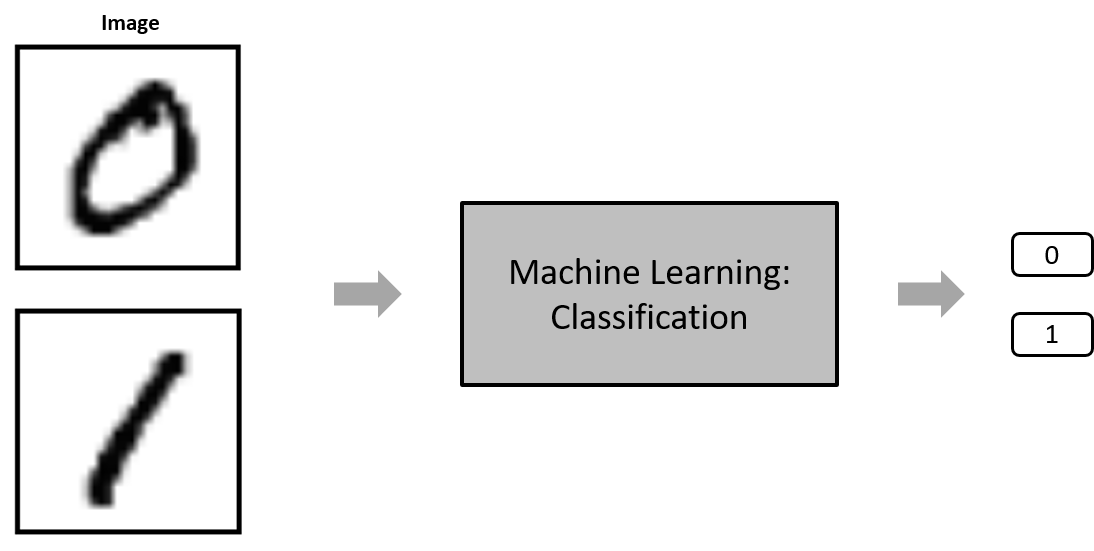</center>
<br>



__Step 1. Load the data__

<br>

|Data | Data dexcription |
|---|---|
|0|1000 images (28×28 pixels) of handwritten digit 0 |
|1|1000 images (28×28 pixels) of handwritten digit 1 |

<br>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

from six.moves import cPickle  # for data loading

data = cPickle.load(open('/content/drive/MyDrive/binary_data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


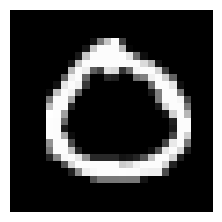

In [4]:
plt.figure(figsize = (12, 8))

plt.subplot(2,4,1), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')






plt.show()

<br>

**Step 2. 특징 추출(Extract features)**
<br>
   입력 데이터로부터 독립적인 특징 요소들을 추출
<br>

$$\phi(x) = \begin{bmatrix} \ \text{feature1}\\ \text{feature2} \end{bmatrix} $$

- Feature 2 : 이미지 전체의 모든 픽셀(Pixel)에 대한 전체 평균
<br>

In [5]:
np.mean(data0[0])

np.float64(39.661989795918366)

In [6]:
np.mean(data1[0])

np.float64(21.855867346938776)


- Feature 1 : 이미지 센터에서 일정한 범위(img[10:20, 10:20])의 픽셀(Pixel)들의 전체 평균

<br>

In [7]:
np.mean(data0[0][10:20,10:20])

np.float64(42.86)

In [8]:
np.mean(data1[0][10:20,10:20])

np.float64(87.6)

In [32]:
X0 = np.hstack([np.mean(data0[:,13:15,13:15],axis=(1,2)).reshape(-1,1),np.mean(data0, axis=(1,2)).reshape(-1,1)])



- Digit 0의 Feature 1(부분평균) + Feature 2(전체평균)


In [ ]:
X0 =

- Digit 1의 Feature 1(부분평균) + Feature 2(전체평균)

In [33]:
X1 = np.hstack([np.mean(data1[:,13:15,13:15],axis=(1,2)).reshape(-1,1),np.mean(data1, axis=(1,2)).reshape(-1,1)])

- Include the ones as the bias term.
<br>
$$\phi(x) = \begin{bmatrix} 1 \\ \text{feature1}\\ \text{feature2} \end{bmatrix} \quad \implies \quad X \; (\text{or } \Phi) = \begin{bmatrix} \phi_1^T\\ \vdots \\ \phi_{1000}^T \\ \phi_{1001}^T \\ \vdots \\ \phi_{2000}^T \end{bmatrix}$$
<br>
You should end up with a $2000\times3$ input matrix with the first $1000$ rows correspond to all of the `data0` and the second 1000 rows correspond to all of the given `data1`. This matrix is matrix $X$ (or $\Phi$) which we learned in a class.
<br>

In [34]:
X = np.vstack([X1,X0])

In [35]:
Y = np.vstack([np.ones((1000,1)),np.zeros((1000,1))])

<br>

__Step 3. Plot the features of data__

<br>


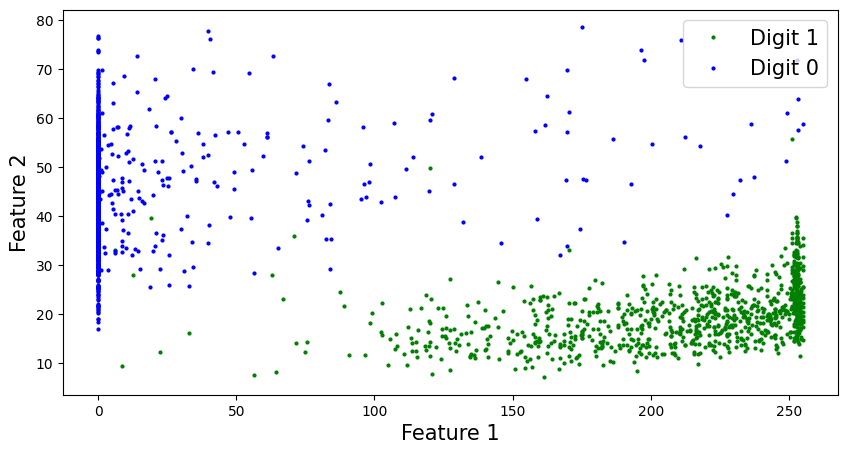

In [36]:
plt.figure(figsize = (10, 5))

plt.plot(X1[:,0],X1[:,1], 'go', markersize = 2, label='Digit 1')
plt.plot(X0[:,0],X0[:,1], 'bo', markersize = 2, label='Digit 0')
plt.legend(fontsize = 15)
plt.xlabel(r'Feature 1', fontsize = 15)
plt.ylabel(r'Feature 2', fontsize = 15)
plt.show()

<br>

__Step 4. Logistic Regression 학습__

<br>

In [37]:
from sklearn import linear_model

clf =linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(X,np.ravel(Y))

LogisticRegression()

In [38]:
clf.coef_

array([[ 0.0382219 , -0.30122777]])

In [39]:
clf.intercept_

array([4.76801688])


<br>

- 파라미터 w 값 계산 및 분류경계선(Decision boundry) plot

<br>

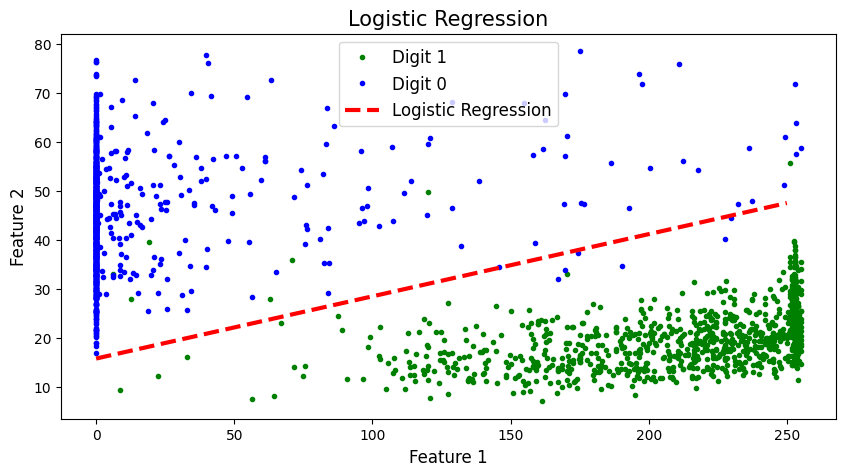

In [40]:
w = np.zeros([3,1])
w[0,0] =clf.intercept_[0]
w[1,0] =clf.coef_[0,0]
w[2,0] =clf.coef_[0,1]

xp =np.linspace(0,250,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10, 5))

plt.plot(X1[:,0], X1[:,1], 'go', markersize = 3, label='Digit 1')
plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 3, label='Digit 0')
plt.plot(xp, yp, 'r--', linewidth = 3, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.legend(fontsize = 12)
plt.xlabel(r'Feature 1', fontsize = 12)
plt.ylabel(r'Feature 2', fontsize = 12)
plt.show()


<br>

__Step 5. New data prediction__

<br>